# Mrakomer and SEVAN data analyse

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

import datetime

Populating the interactive namespace from numpy and matplotlib


## Parsing CSV files Mrakomer + SEVAN


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


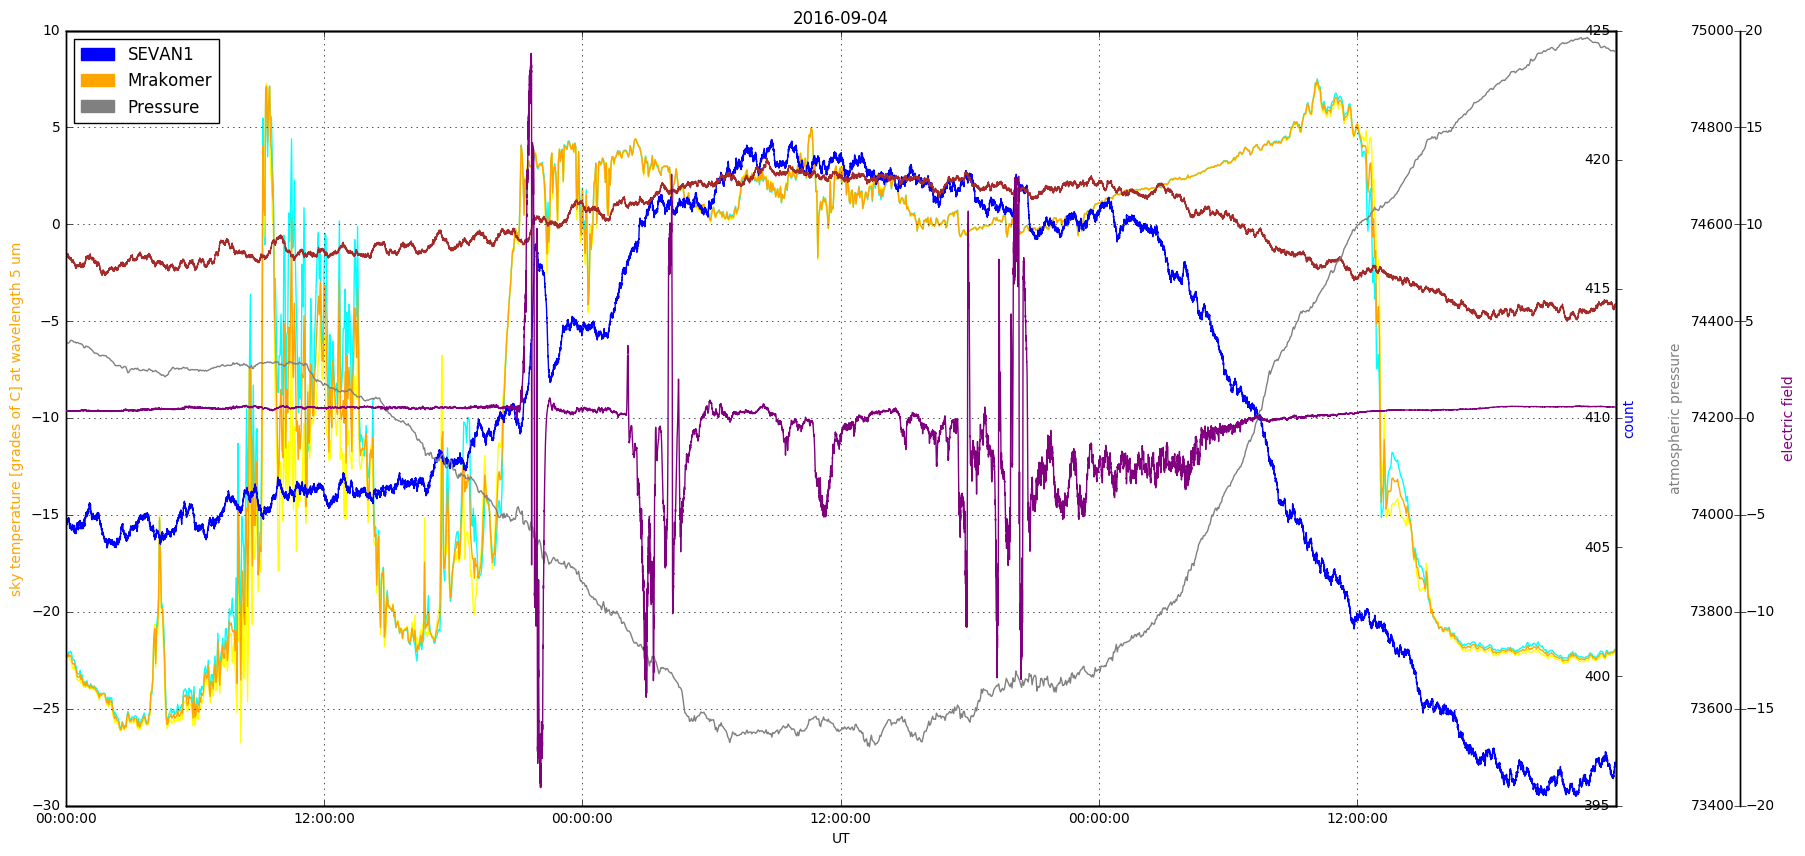

In [62]:
dfMM = pd.read_csv('mm.csv',sep=',', header=None)
dfMM[0] = pd.to_datetime(dfMM[0],unit='s')
dfMM.set_index(0,inplace = True)
dfMM = dfMM.resample('160S', how=mean) # presampluje na jednotny cas
#dfMM = pd.rolling_mean(dfMM,window)
#dfMM = pd.rolling_mean(dfMM,20)

dfSV1 = pd.read_csv('sv1.csv', header=None, delim_whitespace=True, skiprows=1)
date = str(dfSV1.at[0,0])
#dfSV1 = dfSV1[dfSV1[2] != 'X']
dfSV1[0] = pd.to_datetime(dfSV1[0] + ' ' + dfSV1[1]) # convert time to pandas datetime
dfSV1[2] = dfSV1[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV1.set_index(0,inplace = True)

dfSV2 = pd.read_csv('sv2.csv', header=None, delim_whitespace=True, skiprows=1)
dfSV2[0] = pd.to_datetime(dfSV2[0] + ' ' + dfSV2[1]) # convert time to pandas datetime
dfSV2[2] = dfSV2[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV2.set_index(0,inplace = True)

dfSV3 = pd.read_csv('sv3.csv', header=None, delim_whitespace=True, skiprows=1)
dfSV3[0] = pd.to_datetime(dfSV3[0] + ' ' + dfSV3[1]) # convert time to pandas datetime
dfSV3[2] = dfSV3[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV3.set_index(0,inplace = True)

fig = plt.figure(figsize=(20, 10))
ax = plt.axes()        
ax.xaxis.grid(True) # vertical lines
ax.yaxis.grid(True) # horizontal lines
plt.grid(True)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

#plt.rc('font', **font)

plt.title(date)
plt.xlabel('UT')

#plt.ylim(0,12500)
plt.ylabel('sky temperature [grades of C] at wavelength 5 um', color='orange')
#plt.plot(dfMM[4], color='pink', linewidth=1,zorder=0)
plt.plot(dfMM[5], color='cyan', linewidth=1,zorder=0)
plt.plot(dfMM[6], color='yellow', linewidth=1)
plt.plot((dfMM[5]+dfMM[6])/2, color='orange', linewidth=1)
#plt.plot(dfMM[5], color='red', linewidth=3)
#plt.ylim(0,100)
ax1 = plt.twinx()
ax1.spines['left'].set_position(('axes', 1))
ax1.set_ylabel('count', color='blue')
ax1.yaxis.set_label_position('right')
ax1.plot(dfSV1[2], color='blue', linestyle = '-',zorder=100)
ax1.plot(dfSV2[2]+315, color='brown', linestyle = '-',zorder=100)
#plt.plot(dfSV3[2]+250, color='purple', linestyle = '-',zorder=100)

ax2 = plt.twinx()
ax2.spines['left'].set_position(('axes', 1.08))
#plt.ylim(74000,75000)
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('atmospheric pressure', color='grey')
ax2.plot(dfMM[3], color='grey', linestyle = '-',zorder=100)

ax3 = plt.twinx()
ax3.spines['right'].set_position(('axes', 1.08))
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('electric field', color='purple')
ax3.plot(dfSV3[2], color='purple', linestyle = '-',zorder=100)

patch1 = matplotlib.patches.Patch(color='blue', label='SEVAN1')
patch2 = matplotlib.patches.Patch(color='orange', label='Mrakomer')
patch3 = matplotlib.patches.Patch(color='grey', label='Pressure')
plt.legend(handles=[patch1,patch2,patch3], loc=2)

## Plot only MM

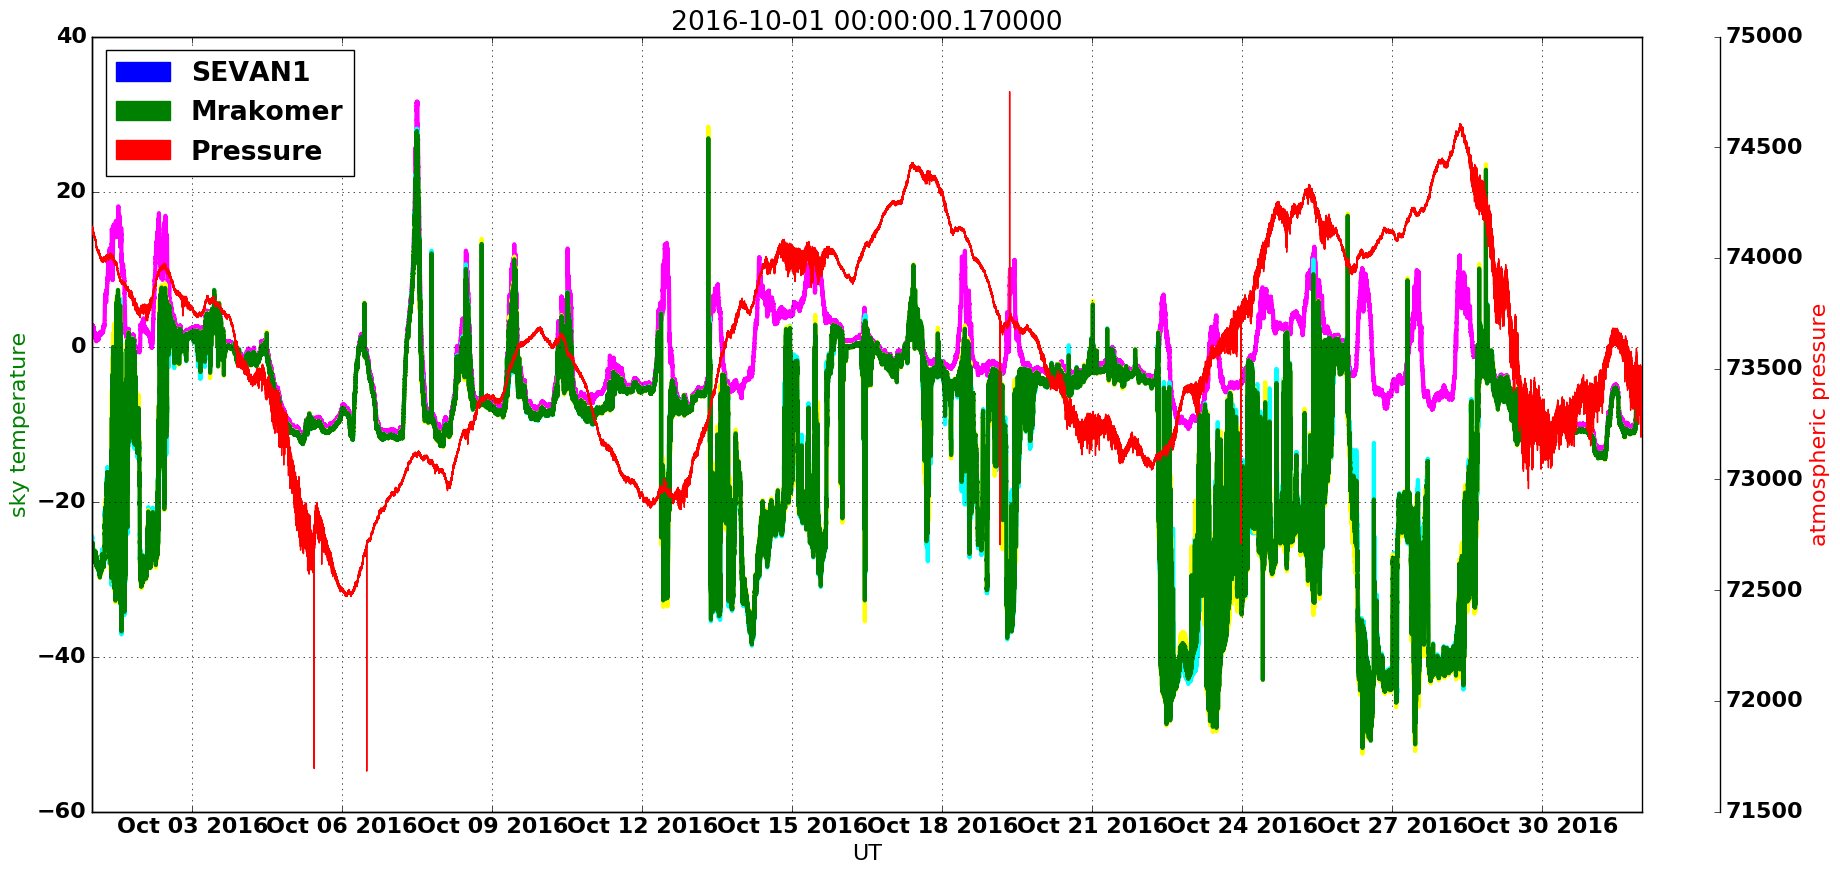

In [68]:
dfMM = pd.read_csv('mm.csv',sep=',', header=None)
dfMM[0] = pd.to_datetime(dfMM[0],unit='s')
dfMM.reset_index(inplace = True)
date = dfMM[0][0]
dfMM.set_index(0,inplace = True)
#dfMM = dfMM.resample(period, how=mean) # presampluje na jednotny cas
#dfMM = pd.rolling_mean(dfMM,window)
#dfMM = pd.rolling_mean(dfMM,20)


fig = plt.figure(figsize=(20, 10))
ax = plt.axes()        
ax.xaxis.grid(True) # vertical lines
ax.yaxis.grid(True) # horizontal lines
plt.grid(True)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

plt.title(date)
plt.xlabel('UT')

#plt.ylim(0,12500)
plt.ylabel('sky temperature', color='green')
plt.plot(dfMM[4], color='magenta', linewidth=3,zorder=0)
plt.plot(dfMM[5], color='cyan', linewidth=3,zorder=0)
plt.plot(dfMM[6], color='yellow', linewidth=3)
plt.plot((dfMM[5]+dfMM[6])/2, color='green', linewidth=3)
#plt.plot(dfMM[5], color='red', linewidth=3)
#plt.ylim(0,100)

par2 = plt.twinx()
par2.spines['right'].set_position(('axes', 1.05))
#plt.ylim(74000,75000)
plt.ylabel('atmospheric pressure', color='red')
plt.plot(dfMM[3], color='red', linestyle = '-',zorder=100)


patch1 = matplotlib.patches.Patch(color='blue', label='SEVAN1')
patch2 = matplotlib.patches.Patch(color='green', label='Mrakomer')
patch3 = matplotlib.patches.Patch(color='red', label='Pressure')
plt.legend(handles=[patch1,patch2,patch3], loc=2)


## Long picture

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


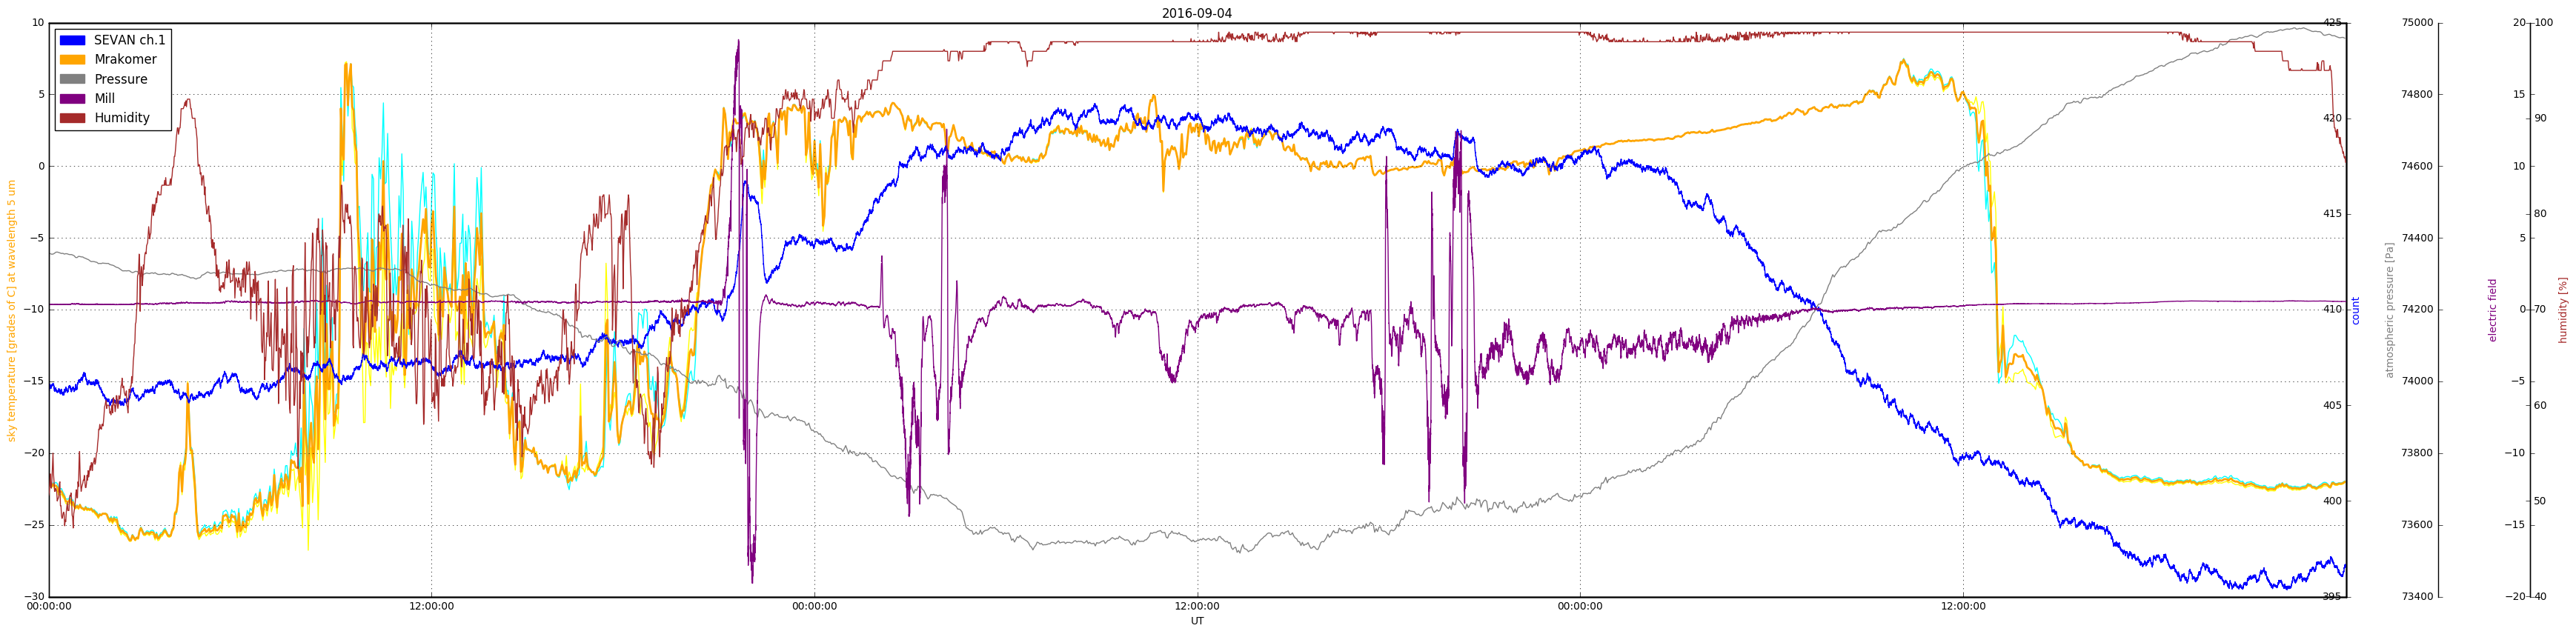

In [81]:
dfMM = pd.read_csv('mm.csv',sep=',', header=None)
dfMM[0] = pd.to_datetime(dfMM[0],unit='s')
dfMM.set_index(0,inplace = True)
dfMM = dfMM.resample('160S', how=mean) # presampluje na jednotny cas
#dfMM = pd.rolling_mean(dfMM,window)
#dfMM = pd.rolling_mean(dfMM,20)

dfSV1 = pd.read_csv('sv1.csv', header=None, delim_whitespace=True, skiprows=1)
date = str(dfSV1.at[0,0])
#dfSV1 = dfSV1[dfSV1[2] != 'X']
dfSV1[0] = pd.to_datetime(dfSV1[0] + ' ' + dfSV1[1]) # convert time to pandas datetime
dfSV1[2] = dfSV1[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV1.set_index(0,inplace = True)

dfSV2 = pd.read_csv('sv2.csv', header=None, delim_whitespace=True, skiprows=1)
dfSV2[0] = pd.to_datetime(dfSV2[0] + ' ' + dfSV2[1]) # convert time to pandas datetime
dfSV2[2] = dfSV2[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV2.set_index(0,inplace = True)

dfSV3 = pd.read_csv('sv3.csv', header=None, delim_whitespace=True, skiprows=1)
dfSV3[0] = pd.to_datetime(dfSV3[0] + ' ' + dfSV3[1]) # convert time to pandas datetime
dfSV3[2] = dfSV3[2].convert_objects(convert_numeric=True) # convert objects to numbers
dfSV3.set_index(0,inplace = True)

fig = plt.figure(figsize=(40, 10))
ax = plt.axes()        
ax.xaxis.grid(True) # vertical lines
ax.yaxis.grid(True) # horizontal lines
plt.grid(True)

font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 16}

#plt.rc('font', **font)

plt.title(date)
plt.xlabel('UT')

#plt.ylim(0,12500)
plt.ylabel('sky temperature [grades of C] at wavelength 5 um', color='orange')
#plt.plot(dfMM[4], color='pink', linewidth=1,zorder=0)
plt.plot(dfMM[5], color='cyan', linewidth=1,zorder=0)
plt.plot(dfMM[6], color='yellow', linewidth=1)
plt.plot((dfMM[5]+dfMM[6])/2, color='orange', linewidth=2)
#plt.plot(dfMM[5], color='red', linewidth=3)
#plt.ylim(0,100)
ax1 = plt.twinx()
ax1.spines['left'].set_position(('axes', 1))
ax1.set_ylabel('count', color='blue')
ax1.yaxis.set_label_position('right')
ax1.plot(dfSV1[2], color='blue', linestyle = '-',zorder=100)
#ax1.plot(dfSV2[2]+315, color='brown', linestyle = '-',zorder=100)
#plt.plot(dfSV3[2]+250, color='purple', linestyle = '-',zorder=100)

ax2 = plt.twinx()
ax2.spines['left'].set_position(('axes', 1.04))
#plt.ylim(74000,75000)
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('atmospheric pressure [Pa]', color='grey')
ax2.plot(dfMM[3], color='grey', linestyle = '-',zorder=100)

ax3 = plt.twinx()
ax3.spines['left'].set_position(('axes', 1.08))
ax3.yaxis.set_label_position('left')
ax3.set_ylabel('electric field', color='purple')
ax3.plot(dfSV3[2], color='purple', linestyle = '-',zorder=100)

ax4 = plt.twinx()
ax4.spines['right'].set_position(('axes', 1.08))
ax4.yaxis.set_label_position('right')
ax4.set_ylabel('humidity [%]', color='brown')
ax4.plot(dfSV2[2], color='brown', linestyle = '-',zorder=100)

patch1 = matplotlib.patches.Patch(color='blue', label='SEVAN ch.1')
patch2 = matplotlib.patches.Patch(color='orange', label='Mrakomer')
patch3 = matplotlib.patches.Patch(color='grey', label='Pressure')
patch4 = matplotlib.patches.Patch(color='purple', label='Mill')
patch5 = matplotlib.patches.Patch(color='brown', label='Humidity')
plt.legend(handles=[patch1,patch2,patch3,patch4,patch5], loc=2)